<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Programming_06_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It's Time to Play Ball (with `matplotlib`)!
### Brendan Shea, PhD

Matplotlib is a powerful and versatile plotting library in Python, widely used for data visualization. It's an essential tool in the toolbox of any data scientist, engineer, or analyst. Matplotlib provides a wide range of plotting functions that make it easy to create static, animated, and interactive visualizations. It excels in making complex tasks simple and straightforward, turning raw data into clear, comprehensible visuals.

One of the strengths of Matplotlib is its ability to integrate with other Python libraries like NumPy and Pandas, allowing for efficient data manipulation and visualization. Whether you're working on a detailed scientific plot, a histogram for statistical data, or a simple line chart, Matplotlib has the functionality you need.

Some main types of graphics supported by matplotlib include the following.

| Type of Graph | Description |
| --- | --- |
| Line Graph | Useful for showing trends over time. |
| Bar Chart | Ideal for comparing quantities among different groups. |
| Histogram | Best for showing the distribution of a dataset. |
| Scatter Plot | Excellent for observing the relationship between two variables. |
| Pie Chart | Suitable for displaying data proportions in a whole. |
| Box Plot | Efficient for depicting groups of numerical data through their quartiles. |
| Heatmap | Great for representing data density or intensity of variables, revealing patterns in complex datasets. |

Imagine a sport popular among Munchkins in the land of Oz, called "Emerald Ball." In this game, players score points by tossing a magical ball into various enchanted hoops. Let's visualize the average scores of top Munchkin players using Matplotlib.

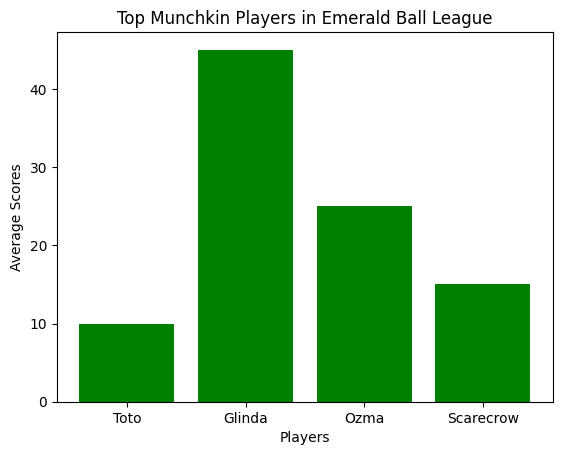

In [1]:
import matplotlib.pyplot as plt

# Sample data for Munchkin players
players = ['Toto', 'Glinda', 'Ozma', 'Scarecrow']
average_scores = [10, 45, 25, 15]

plt.bar(players, average_scores, color='green')
plt.xlabel('Players')
plt.ylabel('Average Scores')
plt.title('Top Munchkin Players in Emerald Ball League')
plt.show()


In this example:

-   We import the `matplotlib.pyplot` module, a primary module in Matplotlib used for plotting graphs.
-   The `players` list contains the names of the players, and `average_scores` represents their corresponding scores.
-   `plt.bar()` creates a bar chart, with `players` on the x-axis and `average_scores` on the y-axis.
-   The `color` parameter in `plt.bar()` is set to 'green', aligning with the emerald theme of Oz.
-   `plt.xlabel()` and `plt.ylabel()` add labels to the x-axis and y-axis, respectively.
-   `plt.title()` provides a title to the bar chart.
-   Finally, `plt.show()` displays the plot.


In this chapter, we'll be exploring how to create a variety of visualizations.

## Intro the Baseball Data Set
In order to demonstrate the functionality of `matplotlib`, we'll explore the widely used  `baseball` dataset. This data set encapsulates the yearly batting records of major league baseball players, serves as an ideal resource for exploring rich, numeric data in the context of data science education. This dataset, sourced from <http://www.baseball-databank.org/> (now defunct), encompasses 21,699 records and covers 1,228 players spanning the years 1871 to 2007. Its inclusion criteria emphasize players with more than 15 seasons of play, ensuring a wealth of longitudinal data.

### Why Use This Dataset?
I realize many of you may not know much about baseball, and that's OK! Here's the idea behing using this data.

1.  The dataset's extensive range of variables and historical depth provides a fertile ground for applying various data science techniques for anaylsis and visualization.

2. The dataset is predominantly numeric, a trait that simplifies certain types of analysis and visualization, especially for beginners.

3. Baseball, as a sport, is quantitatively driven, making this dataset an exemplary case for understanding how data analysis can offer insights into real-world scenarios.

### Dataset Format

The dataset is structured as a data frame with dimensions 21,699 x 22, meaning it contains 21,699 records across 22 variables.
### Key Variables

-   id: A unique identifier for each player.
-   year: The specific year of the record.
-   team, lg: Information about the team and league.
-   g, ab, r: Game statistics including the number of games, times at bat, and runs.
-   h, X2b, X3b, hr: Hit details, including total hits and hits resulting in reaching different bases.
-   rbi, sb, cs: Runs batted in and base-stealing statistics.
-   bb, so, ibb: Walks and strikeouts, both intentional and overall.
-   hbp, sh, sf, gidp: Other batting statistics like hits by pitch and sacrifice hits.

This dataset is included in the `pydataset` package, which include hundreds of pre-formatted datasets intended for educational purposes. Here's how we do this.

In [2]:
# Load the "baseball" dataset
!pip install pydataset -q # Install required packages
from pydataset import data
import pandas as pd

baseball_df = data('baseball')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


Now, we are going to **"clean"** the data to prepare it for further analysis. Here, we are focusing on players after 1900, and dropping columns that have significant numbers of **null** (missing) values.

In [3]:
# drop players before 1914 (when Babe Ruth started)
baseball_df = baseball_df[baseball_df.year >= 1914]
# drop ibb, sf, cs, gidp
baseball_df = baseball_df.drop(columns=['ibb', 'sf', 'cs', 'gidp'])

## Basic Data Exploration
Let's take a brief look our cleaned data before moving on to visualizations.

In [4]:
# Display the first few records
baseball_df.head()

,id,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,bb,so,hbp,sh
14423,ainsmed01,1914,1,WS1,AL,62,151,11,34,7,0,0,13.0,8.0,9,28.0,1.0,1.0
14425,altroni01,1914,1,WS1,AL,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
14427,austiji01,1914,1,SLA,AL,130,466,55,111,16,4,0,30.0,20.0,40,59.0,1.0,16.0
14441,bendech01,1914,1,PHA,AL,28,62,4,9,1,0,1,8.0,0.0,4,13.0,0.0,4.0
14460,bressru01,1914,1,PHA,AL,29,51,6,11,1,1,0,4.0,0.0,6,7.0,1.0,2.0


In [5]:
# Information about data types and missing values
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19194 entries, 14423 to 89534
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      19194 non-null  object 
 1   year    19194 non-null  int64  
 2   stint   19194 non-null  int64  
 3   team    19194 non-null  object 
 4   lg      19194 non-null  object 
 5   g       19194 non-null  int64  
 6   ab      19194 non-null  int64  
 7   r       19194 non-null  int64  
 8   h       19194 non-null  int64  
 9   X2b     19194 non-null  int64  
 10  X3b     19194 non-null  int64  
 11  hr      19194 non-null  int64  
 12  rbi     19194 non-null  float64
 13  sb      19194 non-null  float64
 14  bb      19194 non-null  int64  
 15  so      19194 non-null  float64
 16  hbp     19192 non-null  float64
 17  sh      19194 non-null  float64
dtypes: float64(5), int64(10), object(3)
memory usage: 2.8+ MB


Our cleaned data contains information about baseball players, including their id, year, stint, team, league, games played, at bats, runs, hits, doubles, triples, home runs, runs batted in, stolen bases, walks, strikeouts, hit by pitch, and sacrifice hits. There are 19194 rows and 18 columns. There are no missing values in the data except for hbp, which has 2 missing values.

## Line Graphs Display Change Over Time
**Line graphs** are essential tools for displaying trends and changes over time. They connect individual data points in a sequence, typically along two axes, creating a 'line' that represents the data's trajectory. Line graphs are most effective when tracking changes across evenly spaced intervals, like time. They are commonly used in various fields such as finance, science, and economics to track stock prices, temperature changes, or market trends over time.

The reason to use a line graph is its clarity in showcasing the direction and rate of change. It helps in identifying trends, patterns, and potential anomalies. For example, in environmental studies, a line graph could illustrate the change in average global temperatures over the decades.

### Creating Line Graphs with Pandas

Pandas integrates seamlessly with Matplotlib for plotting purposes. The beauty of Pandas is its simplicity in converting DataFrame columns into graphical representations. The general syntax to create a line graph directly from a Pandas DataFrame is:

```python
DataFrame.plot.line(
  x='x_column', # required
  y='y_column', # required
  figsize=(width, height), # optional
  grid=True,  # optional
  title='Your Title',  # optional
  xlabel='X-axis Label', # optional
  ylabel='Y-axis Label') # optional
```

Where:

-   `x='x_column'` specifies the column for the x-axis.
-   `y='y_column'` is the column for the y-axis.
-   `figsize` determines the size of the plot.
-   `grid` adds a grid for easier reading.
-   `title`, `xlabel`, and `ylabel` provide context through labels and titles.

For example, `baseball_df`  includes data on home runs ('hr') per year. To visualize the trend of home runs over the years, you can use the following code:

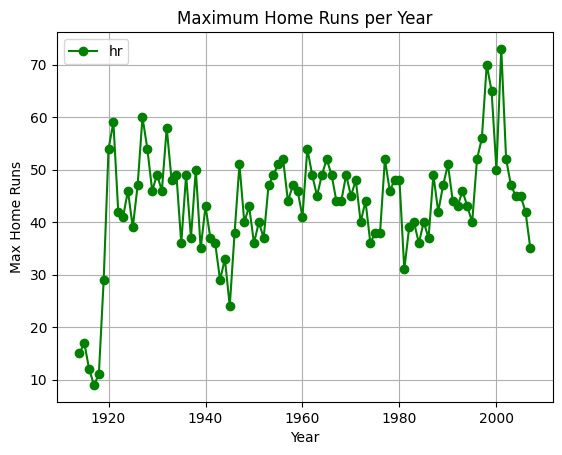

In [18]:
# Group the data by 'year' and calculate the max home runs ('hr') for each year
yearly_max_home_runs = baseball_df.groupby('year')['hr'].max().reset_index()

# Create a line plot for the maximum home runs per year
yearly_max_home_runs.plot.line(
                          x='year',
                          y='hr',
                          color='green',
                          marker='o',
                          title='Maximum Home Runs per Year')

plt.xlabel('Year')
plt.ylabel('Max Home Runs')
plt.grid(True)
plt.show()

This line graph represents the maximum number of home runs hit by a single player in each year. The x-axis shows the years, and the y-axis shows the maximum number of home runs. Each point on the graph corresponds to the highest home run total achieved by an individual player in that particular year.  From the graph, we can observe several interesting patterns:

1.  There is considerable fluctuation in the maximum number of home runs hit from year to year. This could be due to a variety of factors, including changes in player abilities, pitching quality, baseball park dimensions, ball composition, or even the prevalent hitting strategies of the times.

2.  There are distinct peaks where the maximum home runs spike significantly. These peaks could correspond to standout seasons by some of baseball's most prolific home run hitters.

3.  Despite the variability, there does not appear to be a clear upward or downward trend over the decades, suggesting that while the game of baseball may have evolved, the capacity for individual players to hit a high number of home runs in a season has remained relatively consistent.

4.  The peak in the late 1990s into the early 2000s could potentially be linked to the so-called "steroid era" in baseball, where the use of performance-enhancing drugs was reportedly widespread.

## Scatterplots Show Relationships Between Numeric Variables
A scatter plot is a type of data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. Scatter plots are particularly useful for identifying the type and strength of the relationship between two variables. If the data points make a line or curve when plotted, it indicates that a relationship exists. For instance, a scatter plot can help determine if an increase in one variable correlates with an increase (or decrease) in another, indicating a positive or negative correlation.

Scatter plots are widely used in statistics, economics, and the natural sciences. For example, in healthcare, scatter plots can illustrate the relationship between exercise frequency and blood pressure levels. They allow researchers to visually assess correlations and can serve as a preliminary indicator of potential causal relationships.

### Creating Scatter Plots with Pandas

Pandas provides a convenient method to create scatter plots directly from a DataFrame, utilizing the `plot()` function, which is highly customizable with various parameters. The general syntax to create a scatter plot is:

```python
DataFrame.plot.scatter(
  x='x_column', # required
  y='y_column', # required
  c='color', # optional
  s='size', # optional
  title='Your Title' # optional)

```

Where:

-   `x='x_column'` denotes the column to be used for the x-axis.
-   `y='y_column'` denotes the column to be used for the y-axis.
-   `c='color'` allows you to specify the color of the markers.
-   `s='size'` sets the size of the markers.
-   `title='Your Title'` adds a title to the scatter plot.


Let's say we want to analyze the relationship between at-bats ('ab') and hits ('h') for players in the baseball dataset. The following code block demonstrates how you might create a scatter plot for this purpose:

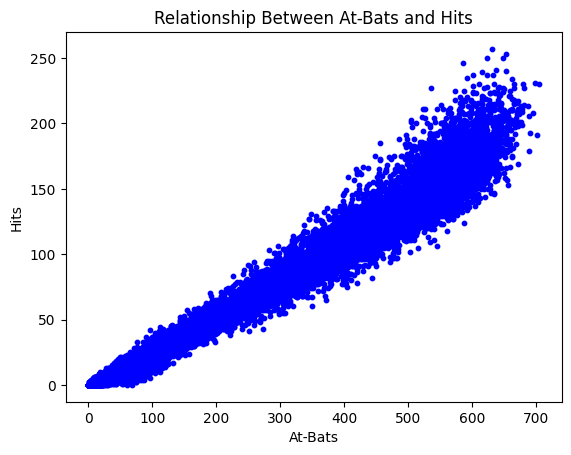

In [8]:
# Plotting the scatter plot
baseball_df.plot.scatter(
    x='ab',
    y='h',
    c='blue',
    s=10,
    title='Relationship Between At-Bats and Hits',
    xlabel = 'At-Bats',
    ylabel = 'Hits')

plt.show()


This shows a *very* strong relationship between the two variables, which isn't surprising -- more chances to hit ("at bats") generally lead to more hits.

## Bar Charts for Comparing Numeric Variables By Category
 A bar chart is a graphical representation used to compare the size of different data points or categories using bars. Each bar's length (or height, in the case of horizontal bars) is proportional to the value it represents. Bar charts are particularly effective for comparing discrete categories or groups. In a bar chart, one axis represents the categories being compared, and the other axis represents a value scale. They are best used when you want to show differences between groups, rather than changes over time, which are better represented by a line graph.

Bar charts are a staple in business, science, and education for their clarity and ease of interpretation. They can highlight differences between groups, such as the sales performance of different products or the population of various cities.

### Creating Bar Charts with Pandas

Pandas, coupled with Matplotlib, makes it straightforward to create bar charts from a DataFrame. The `plot()` function can be used with the `kind='bar'` parameter to create vertical bar charts or `kind='barh'` for horizontal bar charts. Here is the general syntax for creating a bar chart using Pandas:

```python
DataFrame.plot(
  kind='bar', # required
  x='category_column', # required
  y='value_column', # required
  color='color', # optional
  title='Your Title', # optional
  legend=True)
```

Where:

-   `kind='bar'` specifies that you want to create a bar chart.
-   `x='category_column'` is the column that contains the categories.
-   `y='value_column'` is the column that contains the numerical data.
-   `color='color'` sets the color of the bars.
-   `title='Your Title'` adds a title to the bar chart.
-   `legend=True` includes a legend to identify data series.



Now, let's create a bar chart to display the top 10 overall run scorers in the `baseball_df` DataFrame. We'll need to aggregate the total runs scored by each player and then sort these totals to find the top scorers:

In [9]:
# Group by playerID and sum the runs
player_total_runs = baseball_df.groupby('id')['r'].sum().sort_values(ascending=False)

# Select the top 10 run scorers
top_scorers = player_total_runs.head(10)

top_scorers

id
henderi01    2295
bondsba01    2227
aaronha01    2174
ruthba01     2174
rosepe01     2165
mayswi01     2062
musiast01    1949
gehrilo01    1888
ottme01      1859
biggicr01    1844
Name: r, dtype: int64

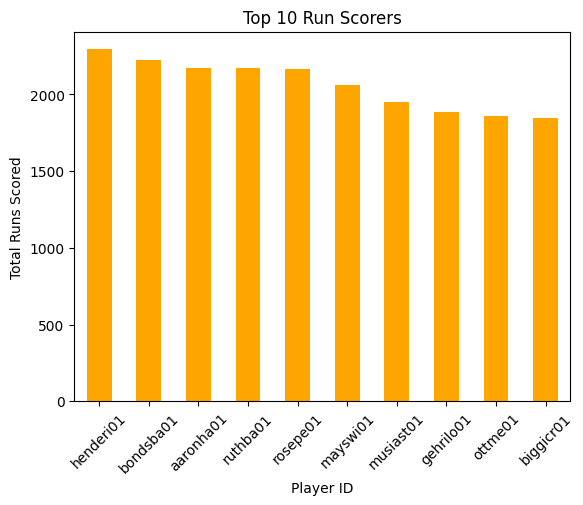

In [10]:
# Plotting the bar chart
top_scorers.plot.bar(
    color='orange',
    title='Top 10 Run Scorers',
    xlabel='Player ID',
    ylabel='Total Runs Scored')

plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()

The bar chart depicting the top 10 run scorers in our baseball dataset reveals a list of legendary players, each with a remarkable number of runs scored throughout their careers. Leading the chart is Rickey Henderson (henderi01) with 2,295 runs, followed closely by Barry Bonds (bondsba01) with 2,227 runs. Not far behind are Hank Aaron (aaronha01) and Babe Ruth (ruthba01), both tied with 2,174 runs. Pete Rose (rosepe01) rounds out the top five with 2,165 runs. Further down the list, we have Willie Mays (mayswi01) with 2,062 runs, Stan Musial (musiast01) with 1,949 runs, Lou Gehrig (gehrilo01) with 1,888 runs, Mel Ott (ottme01) with 1,859 runs, and Craig Biggio (biggicr01) with 1,844 runs.

## Exercises
Exercise 1: Create a line chart that displays the evolution of a player's batting average over their career.
Instructions:

1.  Choose a player from the `baseball_df` DataFrame by filtering the data using the 'playerID' column.
2.  Calculate the player's batting average for each year. The batting average is calculated by dividing the number of hits ('h') by the number of at-bats ('ab').
3.  Plot a line chart with years on the x-axis and the calculated batting average on the y-axis.
4.  Make sure to include a title for the chart, such as "Career Batting Average of [Player Name]".
5.  Label the x-axis as "Year" and the y-axis as "Batting Average".
6.  Choose a color for the line.

In [11]:
# Your code here

Exercise 2. Create a scatter plot tracking the number of strikeouts versus home runs hit by players in a single season. Instructions:

1.  Use the `baseball_df` DataFrame to select the 'so' (strikeouts) and 'hr' (home runs) columns for a specific year.
2.  Create a scatter plot with strikeouts on the x-axis and home runs on the y-axis.
3.  Include a title for the chart, like "Relationship Between Strikeouts and Home Runs in [Year]".
4.  Label the x-axis as "Strikeouts" and the y-axis as "Home Runs".
5.  Assign a color to the data points.

In [12]:
# Your code here.

Exercise 3: Create a bar char identifying the 10 players with the most stolen bases in a single season. Instructions:

1.  Filter the `baseball_df` DataFrame for a particular year using the 'year' column.
2.  Group the data by 'playerID' and sum the 'sb' (stolen bases).
3.  Sort the players by the total stolen bases in descending order and select the top 10.
4.  Create a bar chart to display these top 10 players with their corresponding stolen base totals.
5.  Title the chart "Top 10 Players with Most Stolen Bases in [Year]".
6.  Label the x-axis with "Player ID" and the y-axis with "Stolen Bases".
7.  Choose a distinct color for the bars.

## Histograms in Data Visualization
A histogram is a graphical representation that organizes a group of data points into user-specified ranges. Similar to a bar chart, a histogram plots the frequency of data points within certain ranges. It is particularly useful for understanding the distribution of numerical data and identifying patterns such as skewness, peaks, and outliers. Histograms are invaluable in statistical analysis for assessing the probability distribution of a dataset.

For example, in an educational setting, a histogram could be used to display the distribution of test scores to understand the overall performance of students. In environmental science, a histogram might show the frequency of temperature readings, helping to visualize climate data.

### Creating Histograms with Pandas

Pandas provides functionality to easily create histograms from a DataFrame using the `hist()` method, allowing for quick exploration of the data distribution. Here's how you can generate a histogram:

```python
DataFrame['numerical_column'].plot.hist(
  bins=number_of_bins,
  color='color',
  edgecolor='edge_color',
  figsize=(width, height))
```

In this syntax:

-   `DataFrame['numerical_column']` specifies the column with numerical data to be distributed across bins.
-   `bins` controls the number of bins (intervals) you want to divide your data into.
-   `color` specifies the color of the bars in the histogram.
-   `edgecolor` defines the color of the edge line of each bar.
-   `figsize` determines the size of the figure.

For example, we can create a histogram tracking strikeouts as follows:

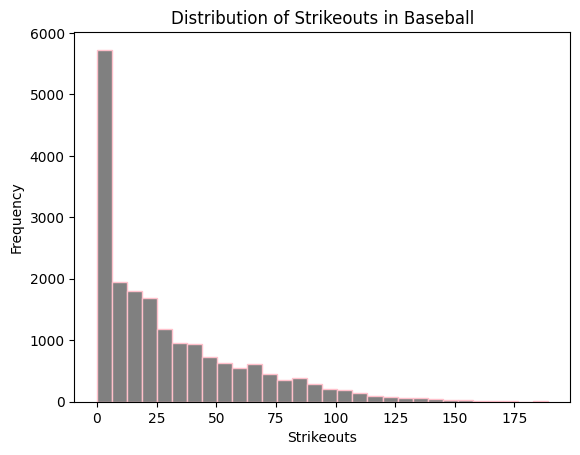

In [13]:
# Creating the histogram
baseball_df['so'].plot.hist(
    bins=30,
    color='grey',
    edgecolor='pink',
    xlabel = 'Strikeouts',
    ylabel = 'Frequency',
    title = 'Distribution of Strikeouts in Baseball'
    )

# For whatever reason, we need to use "native" matplotlib
# To get x-labels to show.

plt.xlabel('Strikeouts')

plt.show()


This histogram visualizes the distribution of strikeouts (notated as 'so' in baseball statistics) in the dataset. Each bar represents the frequency of players that fall within a specific range of strikeouts. Some things of note:

1.  The histogram shows a **right-skewed distribution**. This means that a large number of players have a low number of strikeouts, and fewer players have a high number of strikeouts.

2. The tallest bar, which represents the most common range of strikeouts, is on the far left. This indicates that the majority of players have a relatively small number of strikeouts.

3.  As we move to the right along the x-axis, the bars decrease in height. This **tail** of the distribution extends towards the higher number of strikeouts, suggesting that it is less common for players to strike out this frequently.

4.  The horizontal axis (x-axis) represents the number of strikeouts, divided into **bins** or intervals. If the bin size is, say, 10 strikeouts per bin, the first bar includes players with 0-9 strikeouts, the next bar includes players with 10-19 strikeouts, and so on.

6. The vertical axis (y-axis) represents the **frequency** of players. For example, the first bar might show that there are over 6,000 player instances with between 0 and 9 strikeouts.

This histogram is useful for understanding players' general performance with respect to striking out. Coaches and players might use this information to identify trends in player performance, training needs, or to scout for players with low strikeout rates.

### Understanding Subplots in Data Visualization
Subplots are a feature in Matplotlib that allows you to place multiple plots in a single figure. Each subplot operates independently within the figure, with its own axes and title. This is particularly useful when you want to compare several distributions or trends side-by-side without creating separate figures for each. Subplots provide a cohesive view of the data, making it easier to analyze and draw comparisons between different variables or datasets.

In the context of education, subplots could be used to compare the performance of students across several tests. In business, they could compare sales data across different quarters or regions simultaneously. Subplots are a versatile tool that can enhance the analytical depth of your data visualization.

### Creating Subplots with Matplotlib

To create subplots, you'll typically use the `subplots()` function from Matplotlib, which initializes a grid of subplots. Here's a basic approach:

```python
fig, ax = plt.subplots(
  nrows=number_of_rows,
  ncols=number_of_columns,
  figsize=(width, height))
```

-   `nrows` and `ncols` specify the number of rows and columns in the subplot grid.
-   `figsize` determines the size of the entire figure that houses all subplots.
-   `fig` is the entire figure object.
-   `ax` is an array of axes objects, which are the individual subplots within the figure.

Each element in `ax` can be used to create a plot just like you would on a single figure. If you have a 2x2 grid of subplots, `ax` will be a 2x2 NumPy array with each element corresponding to a subplot.

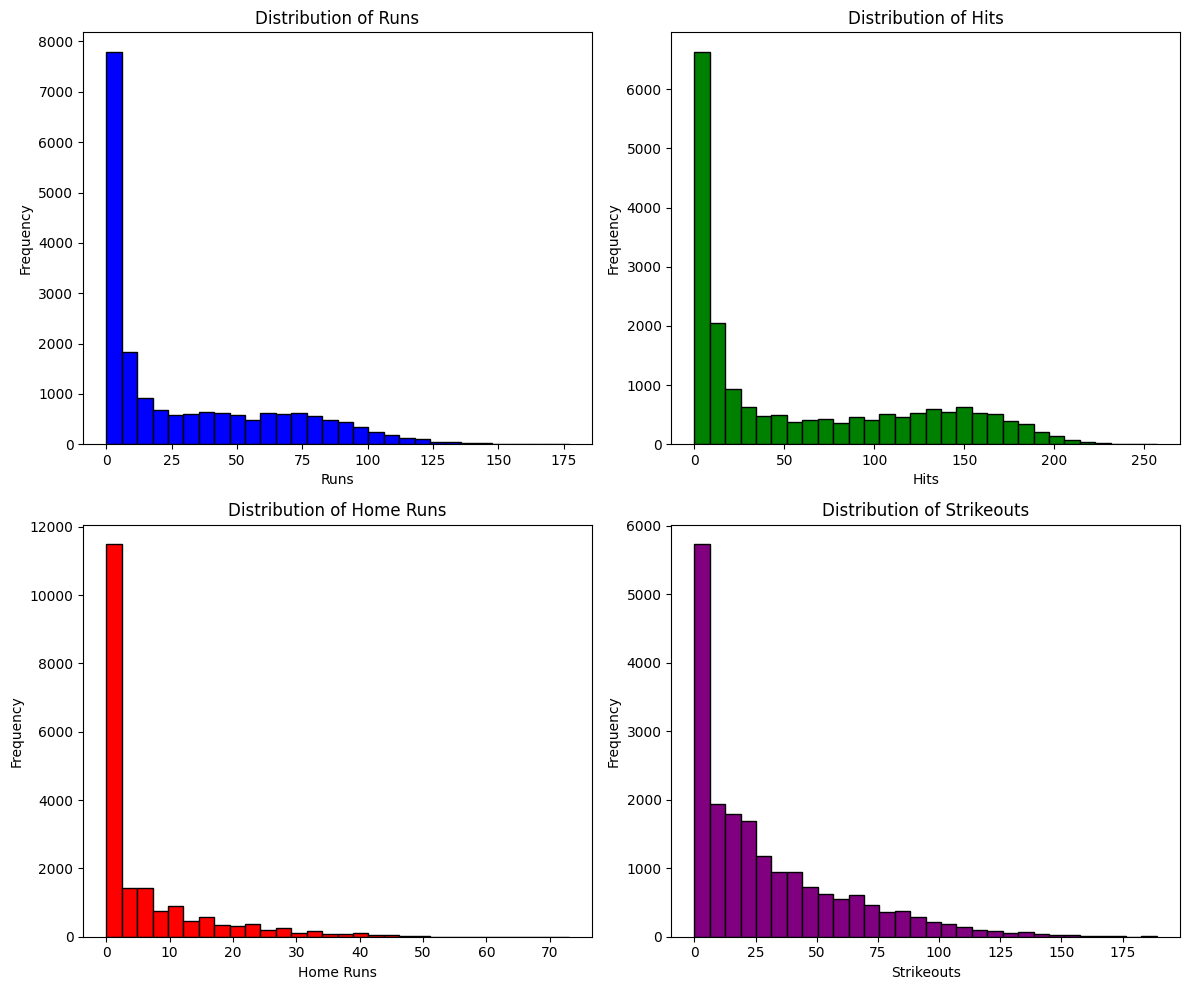

In [14]:
# Set up a 2x2 subplot layout
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(12, 10))

# Plot a histogram of runs on the top left subplot using DataFrame.plot
baseball_df['r'].plot(kind='hist', bins=30, color='blue', edgecolor='black', ax=axes[0, 0], title='Distribution of Runs')
axes[0, 0].set_xlabel('Runs')
axes[0, 0].set_ylabel('Frequency')

# Plot a histogram of hits on the top right subplot using DataFrame.plot
baseball_df['h'].plot(kind='hist', bins=30, color='green', edgecolor='black', ax=axes[0, 1], title='Distribution of Hits')
axes[0, 1].set_xlabel('Hits')
axes[0, 1].set_ylabel('Frequency')

# Plot a histogram of home runs on the bottom left subplot using DataFrame.plot
baseball_df['hr'].plot(kind='hist', bins=30, color='red', edgecolor='black', ax=axes[1, 0], title='Distribution of Home Runs')
axes[1, 0].set_xlabel('Home Runs')
axes[1, 0].set_ylabel('Frequency')

# Plot a histogram of strikeouts on the bottom right subplot using DataFrame.plot
baseball_df['so'].plot(kind='hist', bins=30, color='purple', edgecolor='black', ax=axes[1, 1], title='Distribution of Strikeouts')
axes[1, 1].set_xlabel('Strikeouts')
axes[1, 1].set_ylabel('Frequency')

# Adjust the layout so that all subplots fit into the figure neatly
plt.tight_layout()
plt.show()